# 13: Julia ve strojovém učení

Tento notebook je výukovým materiálem v předmětu BI-JUL.21 vyučovaném v zimním semestru akademického roku 2021/2022 [Tomášem Kalvodou](mailto:tomas.kalvoda@fit.cvut.cz). Tvorba těchto materiálů byla podpořena NVS FIT.

Hlavní stránkou předmětu, kde jsou i další notebooky a zajímavé informace, je jeho [Course Pages](https://courses.fit.cvut.cz/BI-JUL) stránka.

In [2]:
versioninfo()

Julia Version 1.8.3
Commit 0434deb161e (2022-11-14 20:14 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 8 × Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, skylake)
  Threads: 1 on 8 virtual cores


----
## 1. Úvod

Julia poměrně přirozeně nachází uplatnění i v různých partiích strojového učení (ML, Machine Learning).
V této oblasti existuje celá řada nástrojů, často vyuužívajících Python.
Existuje celá řada Julia balíčků poskytujících rozhraní k známým nástrojům, např:

 * [`Keras.jl`](https://github.com/ayush1999/Keras.jl),
 * [`TensorFlow.jl`](https://github.com/malmaud/TensorFlow.jl),
 * a další.

Vedle toho vznikají i nástroje založené přímo na Julia, např.:

 * [`DecisionTree.jl`](https://github.com/bensadeghi/DecisionTree.jl),
 * [`FluxML.jl`](https://fluxml.ai),
 * [`MLJ.jl`](https://alan-turing-institute.github.io/MLJ.jl/dev/),
 * a další.

V tomto **Vánočním notebooku** se podíváme na první dva balíčky.
Tématicky půjde o **rozhodovací stromy** a **neuronové sítě**.
Pole strojového učení je ovšem velmi široké, řada z vás ještě tuto látku neprobírala, takže tento notebook je spíše reklama na to co vás čeká a jak v této oblasti může Julia pomoci.

----
## 2. Rozhodovací stromy

Klasickou ukázkou použití rozhodovacích stromů je klasifikace kosatců na základě velikosti okvětních lístků uložených v tzv. [Iris datasetu](https://en.wikipedia.org/wiki/Iris_flower_data_set).

Této úlohy využijeme k demonstraci balíčku [`DecisionTree.jl`](https://github.com/bensadeghi/DecisionTree.jl), nezapomeňte tento balíček nainstalovat `] add DecisionTree`.

In [1]:
using DecisionTree

Data jsou distribuována přímo v balíčku.

In [3]:
features, labels = load_data("iris")

(Any[5.1 3.5 1.4 0.2; 4.9 3.0 1.4 0.2; … ; 6.2 3.4 5.4 2.3; 5.9 3.0 5.1 1.8], Any["Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa"  …  "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-virginica"])

Příznaky jsou čtyři délky různých okvětních lístků, co řádek, to jedna květina:

In [4]:
features = float.(features)

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

A dále máme k dispozici informaci o jaké kosatce v těchto případech šlo:

In [5]:
labels = string.(labels)

150-element Vector{String}:
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 ⋮
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"

Celkem jsou v datasetu rozlišovány tři druhy kosatců:

In [6]:
unique(labels)

3-element Vector{String}:
 "Iris-setosa"
 "Iris-versicolor"
 "Iris-virginica"

Vytvoříme a natrénujeme model:

In [7]:
model = build_tree(labels, features)

Decision Tree
Leaves: 9
Depth:  5

In [8]:
print_tree(model)

Feature 3 < 2.45 ?
├─ Iris-setosa : 50/50
└─ Feature 4 < 1.75 ?
    ├─ Feature 3 < 4.95 ?
        ├─ Feature 4 < 1.65 ?
            ├─ Iris-versicolor : 47/47
            └─ Iris-virginica : 1/1
        └─ Feature 4 < 1.55 ?
            ├─ Iris-virginica : 3/3
            └─ Feature 1 < 6.95 ?
                ├─ Iris-versicolor : 2/2
                └─ Iris-virginica : 1/1
    └─ Feature 3 < 4.85 ?
        ├─ Feature 1 < 5.95 ?
            ├─ Iris-versicolor : 1/1
            └─ Iris-virginica : 2/2
        └─ Iris-virginica : 43/43


Prořežeme strom:

In [9]:
model = prune_tree(model, 0.9)

Decision Tree
Leaves: 8
Depth:  5

Rozhodovací strom si můžeme přehledně zobrazit:

In [10]:
print_tree(model)

Feature 3 < 2.45 ?
├─ Iris-setosa : 50/50
└─ Feature 4 < 1.75 ?
    ├─ Feature 3 < 4.95 ?
        ├─ Iris-versicolor : 47/48
        └─ Feature 4 < 1.55 ?
            ├─ Iris-virginica : 3/3
            └─ Feature 1 < 6.95 ?
                ├─ Iris-versicolor : 2/2
                └─ Iris-virginica : 1/1
    └─ Feature 3 < 4.85 ?
        ├─ Feature 1 < 5.95 ?
            ├─ Iris-versicolor : 1/1
            └─ Iris-virginica : 2/2
        └─ Iris-virginica : 43/43


A učinit pomocí něho klasifikaci:

In [11]:
apply_tree(model, [5.9, 3.0, 5.1, 1.9])

"Iris-virginica"

Pustěme ho na všech 150 záznamů v databázi:

In [12]:
preds = apply_tree(model, features)

150-element Vector{String}:
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 ⋮
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"

Jak přesné jsou naše předpovědi? K vyjádření kolikrát se náš klasifikátor "trefil" do správné třídy můžeme použít _confusion matrix_:

In [ ]:
DecisionTree.confusion_matrix(labels, preds)

Vidíme, že jednu květinu z použitých dat klasifikuje špatně.

Můžeme získat i informaci o tom, jak je naše předpověď pravděpodobná. Následující příznaky jsou opět přímo z datasetu, takže výsledná kategorie má pravděpodobnost 1.

In [13]:
apply_tree_proba(model, [5.9, 3.0, 5.1, 1.9], ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

3-element Vector{Float64}:
 0.0
 0.0
 1.0

V následujícím příkladě se klasifikátor významněji přiklání k jedné z kategorií.

In [14]:
apply_tree_proba(model, [5.7, 3.2, 4.9, 1.7], ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

3-element Vector{Float64}:
 0.0
 0.9791666666666666
 0.020833333333333332

Pro další ukázky viz stránky použitého balíčku.

----
## 3. Neuronové sítě

Pro práci s neuronovými sítěmi se jako velmi atraktivní jeví balíček [`Flux.jl`](https://fluxml.ai), tj. `] add Flux`.

In [1]:
using Flux

Ukažme si (například pro studenty, kteří tuto látku ještě nestudovali) základní princip učení neuronové sítě.

Mějme závislost jedné reální proměnné $y$ na jedné reálné proměnné $x$ danou explicitním předpisem:

In [2]:
actual(x) = 4x + 2

actual (generic function with 1 method)

Příprava trénovacích a testovacích dat sestávajících vždy z několika málo hodnot.

In [3]:
x_train, x_test = hcat(0:5...), hcat(6:10...)

([0 1 … 4 5], [6 7 … 9 10])

A skutečné hodnoty na trénovacích i testovacích datech.

In [4]:
y_train, y_test = actual.(x_train), actual.(x_test)

([2 6 … 18 22], [26 30 … 38 42])

Sestavení modelu a předpovídání. Konkrétně budeme mít jeden neuron s jedním vstupem a jedním výstupem.

In [5]:
model = Dense(1, 1)

Dense(1 => 1)       # 2 parameters

V tomto případě jde o funkci $\sigma(w\cdot x + b)$, kde $w$ je váha:

In [6]:
model.weight

1×1 Matrix{Float32}:
 0.5675245

$b$ je bias:

In [7]:
model.bias

1-element Vector{Float32}:
 0.0

a $\sigma$ je aktivační funkce, zde identita,

In [8]:
model.σ

identity (generic function with 1 method)

Tento triviální model má tedy dva reálné parametry. Aktuálně dává model následující předpovědi (samozřejmě zcela mimo, zatím jsme ho nenatrénovali):

In [9]:
model(x_train)

1×6 Matrix{Float32}:
 0.0  0.567524  1.13505  1.70257  2.2701  2.83762

Přesnost předpověďí našeho modelu budeme měřit pomocí (objektivní) _loss_ funkce (MSE = _mean square error_):

In [10]:
loss(x, y) = Flux.mse(model(x), y)

loss (generic function with 1 method)

Jde o průměrnou hodnota kvadratických odchylek, tedy pro $x,y\in\mathbb{R}^n$ o výraz

$$ \frac{1}{n} \sum_{j=1}^n (x_j - y_j)^2. $$

"Chyba" je tedy zatím dost velká (z nějakého důvodu zde máme 32 bitový float):

In [11]:
loss(x_train, y_train)

146.3254f0

Pro kontrolu:

In [12]:
sum((model(x_train) - y_train) .* (model(x_train) - y_train)) / length(x_train)

146.3254f0

K **učení** použijeme jednoduchý gradientní sestup. V tento moment opět neděláme nic jiného, než že řešíme optimalizační úlohu!

In [13]:
opt = Descent() # gradientní sestup

Descent(0.1)

Kompletní trénovací data:

In [14]:
data = [(x_train, y_train)]

1-element Vector{Tuple{Matrix{Int64}, Matrix{Int64}}}:
 ([0 1 … 4 5], [2 6 … 18 22])

Parametry modelu (váha a bias):

In [15]:
parameters = Flux.params(model)

Params([Float32[0.5675245;;], Float32[0.0]])

Jedna epocha (jedna iterace/jeden krok optimalizačního algoritmu) proběhne zavoláním metody `train!`:

In [16]:
Flux.Optimise.train!(loss, parameters, data, opt) # `model` je "schován" v loss funkci!

_Loss_ funkce se zmenšila!

In [17]:
loss(x_train, y_train)

138.86488f0

Samozřejmě se změnily i naše dva parametry:

In [18]:
parameters

Params([Float32[7.860397;;], Float32[2.116238]])

Toto byla jen jedna epocha, data jsme prošli jen jednou.
Projděme více epoch.

In [19]:
for epoch in 1:100
    Flux.Optimise.train!(loss, parameters, data, opt)
end

Zřejmě se blížíme k minimu (a nebo? :-)).

In [20]:
loss(x_train, y_train)

0.749681f0

In [21]:
parameters

Params([Float32[4.2658257;;], Float32[2.0727146]])

V těchto parametrech již jistě rozeznáváte původní hodnoty, z kterých jsme data nagenerovali.
Případně učení můžeme prohnat ještě pár dalšími epochami.

Jaké předpovědi dává náš model na testovacích datech?

In [22]:
model(x_test)

1×5 Matrix{Float32}:
 27.6677  31.9335  36.1993  40.4651  44.731

"Správně" bychom očekávali:

In [23]:
y_test

1×5 Matrix{Int64}:
 26  30  34  38  42

V podstatě jsme samozřejmě neudělali nic jiného, než lineární regresi (proložení dat přímkou).

----
### Rozpoznávání cifer

Ukažme si komplikovanější příklad perceptronu z dokumentace [Flux](https://fluxml.ai/tutorials/2021/01/26/mlp.html) (aktuálně 404), resp. tohoto [blogu](https://towardsdatascience.com/deep-learning-with-julia-flux-jl-story-7544c99728ca).

In [1]:
using Flux
using MLDatasets
using Statistics

import Flux: onehotbatch, onecold, crossentropy, @epochs, unsqueeze

Nejprve získejme data, v tomto případě MNIST ([_Modified National Institute of Standards and Technology database_](https://en.wikipedia.org/wiki/MNIST_database)) obsahující obrázky arabských číslic nula až devět jakožto 28x28 pixelové obrázky.
Data jsou i anotována "správnou" hodnotou.

Při prvním spuštění následujícího příkazu musíte potvrdit stažení souborů.

In [2]:
# trénovací data
x_train, y_train = MLDatasets.MNIST.traindata(Float32);

┌ Warning: MNIST.traindata() is deprecated, use `MNIST(split=:train)[:]` instead.
└ @ MLDatasets /home/kalvin/.julia/packages/MLDatasets/A3giY/src/datasets/vision/mnist.jl:187


V poli `x_train` jsou uloženy obrázky, konkrétně celkem $60\,000$ obrázků.

In [3]:
typeof(x_train), size(x_train)

(Array{Float32, 3}, (28, 28, 60000))

Pojďme se alespoň na pár podívat (rotace/zrcadlení?).

In [4]:
x_train[:, :, 1]

28×28 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0        0.0  0.0  0.0
 ⋮

A skutečně graficky:

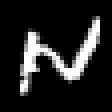

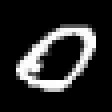

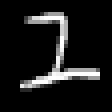

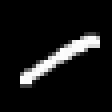

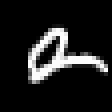

In [5]:
using Images

display(Gray.(x_train[:, :, 1]))
display(Gray.(x_train[:, :, 2]))
display(Gray.(x_train[:, :, 3]))
display(Gray.(x_train[:, :, 4]))
display(Gray.(x_train[:, :, 5]))

V poli `y_train` jsou uložené cifry, které obrázky reprezentují.

In [6]:
typeof(y_train), size(y_train)

(Vector{Int64}, (60000,))

Prvních pět obrázků zobrazených výše by tedy mělo reprezentovat následující cifry:

In [7]:
y_train[1:5]

5-element Vector{Int64}:
 5
 0
 4
 1
 9

Dále si připravíme testovací data.

In [8]:
# testovací (validační) data
x_valid, y_valid = MLDatasets.MNIST.testdata(Float32);

┌ Warning: MNIST.testdata() is deprecated, use `MNIST(split=:test)[:]` instead.
└ @ MLDatasets /home/kalvin/.julia/packages/MLDatasets/A3giY/src/datasets/vision/mnist.jl:195


Aktuálně jsou data čistě ve formě matic, Flux očekává obrázková data včetně barevného kanálu (u nás je jen jeden - odstíny šedi). Musíme tak data obohatit o ještě jeden rozměr ("délky").
K tomu máme k dispozici metodu `unsqueeze`:

In [9]:
x_train = unsqueeze(x_train, 3)
x_valid = unsqueeze(x_valid, 3);

In [11]:
typeof(x_train), size(x_train)

(Array{Float32, 4}, (28, 28, 1, 60000))

Podobně jako dříve v Sudoku budeme místo cifer pracovat s desetisložkovým vektorem tvořeným samými nulami a jednou jedničkou na místě odpovídajícím cifře.
K jednoduchému přepočítání našich dat k tomu slouží metoda `onehotbatch`.
Výsledkem bude řídká matice, s kterou se dá dále efektivně pracovat.

In [12]:
y_train = onehotbatch(y_train, 0:9)
y_valid = onehotbatch(y_valid, 0:9)

10×10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  …  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  1     ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

Nyní vše spojíme do jednoho datasetu reprezentujícího trénovací data:

In [13]:
train_data = Flux.Data.DataLoader((x_train, y_train), batchsize=128);

Nyní sestavíme náš model.
Zvolíme osm vrstev, v tento okamžik zde nebudeme zabýhat do detailu.

In [14]:
model = Chain(
    # 28x28 => 14x14
    Conv((5, 5), 1=>8, pad=2, stride=2, relu),
    # 14x14 => 7x7
    Conv((3, 3), 8=>16, pad=1, stride=2, relu),
    # 7x7 => 4x4
    Conv((3, 3), 16=>32, pad=1, stride=2, relu),
    # 4x4 => 2x2
    Conv((3, 3), 32=>32, pad=1, stride=2, relu),
    
    GlobalMeanPool(),
    Flux.flatten,
    
    Dense(32, 10),
    softmax
)

Chain(
  Conv((5, 5), 1 => 8, relu, pad=2, stride=2),  # 208 parameters
  Conv((3, 3), 8 => 16, relu, pad=1, stride=2),  # 1_168 parameters
  Conv((3, 3), 16 => 32, relu, pad=1, stride=2),  # 4_640 parameters
  Conv((3, 3), 32 => 32, relu, pad=1, stride=2),  # 9_248 parameters
  GlobalMeanPool(),
  Flux.flatten,
  Dense(32 => 10),                      # 330 parameters
  NNlib.softmax,
)                   # Total: 10 arrays, 15_594 parameters, 62.445 KiB.

Model jsme ještě nevytrénovali, ale i tak můžeme zkusit, jestli někde není chyba:

In [15]:
# Getting predictions
z = model(x_train)
# Decoding predictions
z = onecold(z)
println("Prediction of first image: $(z[1])")

Prediction of first image: 2


Pojďme "přesnost" měřit následovně (tj. 0 == nikdy jsme se netrefili, 1 == kompletní shoda):

In [16]:
accuracy(z, y) = mean(onecold(z) .== onecold(y))

accuracy (generic function with 1 method)

Aktuálně bychom měli mít velmi nízkou shodu, jak se snadno přesvědčíme:

In [17]:
accuracy(z, y_train)

0.0

Nyní zbývá zadefinovat _loss_ funkci a připravit se na učení.

In [18]:
loss(x, y) = Flux.crossentropy(model(x), y)
opt = Descent()
ps = Flux.params(model)

Params([[0.04345867 0.0519028 … 0.030679185 -0.11206507; -0.0695501 0.13440974 … -0.0028491213 -0.10806305; … ; 0.082303025 -0.121138975 … -0.0427864 0.027985096; 0.04478124 -0.03732655 … -0.11871343 -0.1358215;;;; 0.103053965 0.13191748 … 0.0390348 -0.0020494254; 0.0094644055 0.14085227 … -0.16249433 0.0603232; … ; 0.0560955 0.018597117 … 0.10506808 0.032174602; -0.055019394 -0.005297032 … -0.06916303 -0.15951283;;;; -0.06410445 -0.09105586 … -0.06425119 -0.09833508; -0.04323213 -0.1531362 … 0.08278113 0.0850655; … ; -0.12999636 -0.029409831 … 0.049379554 -0.16300139; 0.14659558 -0.07386534 … -0.13154443 -0.12172512;;;; -0.05182951 -0.1317463 … 0.0729956 -0.03497103; -0.07068439 -0.10213475 … -0.16189586 0.13950673; … ; -0.15886292 0.123373725 … -0.013489984 -0.08300134; -0.014450125 -0.10403124 … 0.045309998 0.03167637;;;; -0.14134175 -0.010377847 … -0.021209463 -0.15274462; 0.13829422 -0.035228282 … -0.064470604 -0.11101778; … ; 0.038298585 0.13067764 … -0.0801855 0.011693977; 0.135

K učení lze použít makro `@epochs`.

In [19]:
number_epochs = 10
@epochs number_epochs Flux.Optimise.train!(loss, ps, train_data, opt)
accuracy(model(x_train), y_train)

┌ Warning: The macro `@epochs` will be removed from Flux 0.14.
│ As an alternative, you can write a simple `for i in 1:epochs` loop.
│   caller = eval at boot.jl:368 [inlined]
└ @ Core ./boot.jl:368
┌ Info: Epoch 1
└ @ Main /home/kalvin/.julia/packages/Flux/ZdbJr/src/optimise/train.jl:185
┌ Info: Epoch 2
└ @ Main /home/kalvin/.julia/packages/Flux/ZdbJr/src/optimise/train.jl:185
┌ Info: Epoch 3
└ @ Main /home/kalvin/.julia/packages/Flux/ZdbJr/src/optimise/train.jl:185
┌ Info: Epoch 4
└ @ Main /home/kalvin/.julia/packages/Flux/ZdbJr/src/optimise/train.jl:185
┌ Info: Epoch 5
└ @ Main /home/kalvin/.julia/packages/Flux/ZdbJr/src/optimise/train.jl:185
┌ Info: Epoch 6
└ @ Main /home/kalvin/.julia/packages/Flux/ZdbJr/src/optimise/train.jl:185
┌ Info: Epoch 7
└ @ Main /home/kalvin/.julia/packages/Flux/ZdbJr/src/optimise/train.jl:185
┌ Info: Epoch 8
└ @ Main /home/kalvin/.julia/packages/Flux/ZdbJr/src/optimise/train.jl:185
┌ Info: Epoch 9
└ @ Main /home/kalvin/.julia/packages/Flux/ZdbJr/src/opti

0.97865

Jak náš model předpovídá a jak přesně?

In [20]:
onecold(model(x_valid))[1:5]

5-element Vector{Int64}:
 8
 3
 2
 1
 5

In [21]:
onecold(y_valid)[1:5]

5-element Vector{Int64}:
 8
 3
 2
 1
 5

In [22]:
accuracy(model(x_valid), y_valid)

0.9743

----
## 4. Uzavření semestru

Tímto se dostáváme na konec prvního běhu BI-JUL.21.
Ve zbylém čase budeme na tomto Vánočním cvičení řešit případné dotazy a zajímavosti.

**Nezapomeňte vyplnit anketu hodnocení výuky!**

----
## Reference

Vedle výše zmíněných balíčků a nástrojů zmíněných v úvodu můžete prohledat i kategorii [_Machine Learning_ v databázi balíčků](https://juliapackages.com/c/machine-learning).